# Zomato Stock Market Dataset

In this notebook will be performed:
1. Importing Libraries
2. Preprocessing
3. Zomato Stock data Analyis
4. Features Seleaction
5. Create Prediction model(Linear Regression Model)
6. Evaluation Metric

Prediction

##**Improt Libraries**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


##**Load(import) Zomato Stack DataSEets Form  'csv' File using Pandas lib Function**

In [ ]:
# Importing and reading file using pandas
Z_data = pd.read_csv("/content/drive/MyDrive/Zomato Stock datasets/ZOMATO.NS.csv")

In [ ]:
# Data Perprocessing

# Understanding Data_set using Pandas Lib

Z_data.shape  # Find Who much shape are Avaliable in data Sets


(249, 7)

##**Data preprocessing & Analysis**

In [ ]:
# Check number of shapes available in dataSets

Z_data.shape  # Count Train DataSet Shape Using Shape

(249, 7)

In [ ]:
# Display All information like Data type and memory uses and so on using info()

Z_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       249 non-null    object 
 1   Open       249 non-null    float64
 2   High       249 non-null    float64
 3   Low        249 non-null    float64
 4   Close      249 non-null    float64
 5   Adj Close  249 non-null    float64
 6   Volume     249 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.7+ KB


In [ ]:
# Display 
Z_data.describe()   # Count mean,median and so on uing describe()

,Open,High,Low,Close,Adj Close,Volume
count,249.000000,249.000000,249.000000,249.000000,249.000000,2.490000e+02
mean,104.382329,106.504819,101.424900,103.673896,103.673896,4.166226e+07
std,34.860880,35.363715,34.083142,34.769891,34.769891,5.291387e+07
min,40.849998,44.400002,40.599998,41.650002,41.650002,4.101820e+06
25%,74.400002,74.849998,71.199997,72.150002,72.150002,1.485174e+07
50%,95.750000,98.000000,93.349998,94.449997,94.449997,2.645290e+07
75%,137.050003,138.949997,133.300003,136.600006,136.600006,4.304954e+07
max,161.149994,169.000000,154.250000,160.300003,160.300003,4.123047e+08


## **Creating Time Series**

In [ ]:
from datetime import datetime

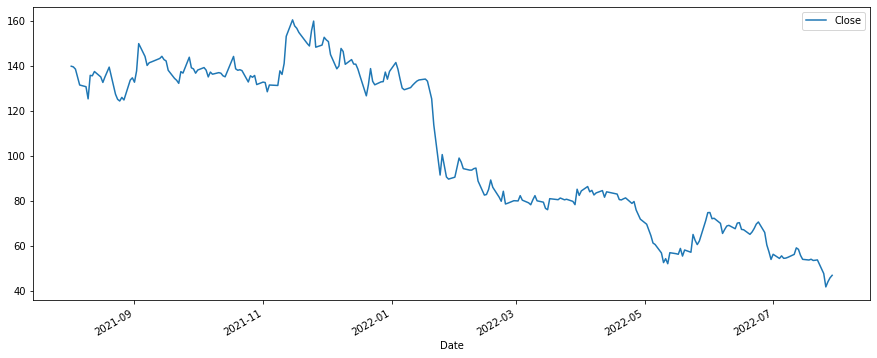

In [ ]:
df = pd.DataFrame(Z_data,  columns = ['Date', 'Close'])

# Set the Date as Index
df['Date'] = pd.to_datetime(df['Date'])
df.index = df['Date']
del df['Date']


df.plot(figsize=(15, 6))
plt.show()

Text(0.5, 1.0, 'Zomato Stock data')

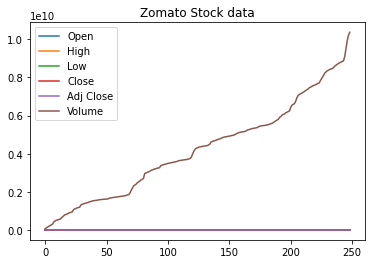

In [ ]:
dr = Z_data.cumsum()
dr.plot()
plt.title('Zomato Stock data')

**All  Years Open-Close Price of Zomato stack**

In [ ]:
# One Years Open-Close
fig = px.line(Z_data, x=Z_data.Date, y=["Open","Close"], log_y=True)

fig.update_layout(title=dict(text="All Years Open-Close Price of Zomato stack",font=dict(size=22)))

fig.show()

**All Years High-Low Price of Zomato stack**

In [ ]:
# All Years High-Low
fig = px.line(Z_data, x=Z_data.Date, y=["High","Low"],log_y=True)

fig.update_layout(title=dict(text="All Years High-Low Price of Zomato stack",font=dict(size=22)))

fig.show()

### **Analysis of missing values (NaNs)**
Find the Null values in Data Sets And Replace the null values using 'ffill' method or Median

In [ ]:
#Find the Null values in Train Data Sets using isna() and count using sum()
Z_data.isna().sum()  

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

##**Features Seleaction**
Seleact Required Features form data_Sets to build a model that can predict The defense readiness condition (DEFCON)

###**Find Depandent and Indepandent variables using datasets,where x are independent values and y : dependent values**

In [ ]:
X = Z_data.drop(['Date','Close'],axis=1)

X.head()

,Open,High,Low,Adj Close,Volume
0,135.750000,140.750000,135.149994,139.699997,66909732
1,137.000000,140.800003,137.000000,139.399994,46610001
2,139.800003,141.000000,135.250000,138.399994,41134419
3,138.750000,138.899994,132.000000,134.949997,38437134
4,135.500000,136.199997,130.100006,131.350006,31975356


##**Traget Variable is y (It's a Closing Price of zomato stock)**

In [ ]:
y = Z_data.Close

y.head()

0    139.699997
1    139.399994
2    138.399994
3    134.949997
4    131.350006
Name: Close, dtype: float64

##**Splitting Data into train and test**

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

print(X_train.shape)
print(X_test.shape)

(199, 5)
(50, 5)



##=============***Machine Learning Models***===============



##**Linear Regression  Model**

In [ ]:
from sklearn.linear_model import LinearRegression
LR_Model = LinearRegression()

### **Fit Dependent and Independent Variables in Linear Regression Model (X_train,y_train)**

In [ ]:
LR_Model.fit(X_train,y_train)

LinearRegression()

##**Prediction**
Predicting the Results

In [ ]:
Y_Pred = LR_Model.predict(X_test)

Y_Pred=pd.Series(Y_Pred)

Y_Pred

0      46.799999
1      83.900002
2     148.699997
3      80.349998
4      79.849998
5     156.550003
6     134.949997
7      80.750000
8      67.050003
9      69.000000
10    131.600006
11     62.299999
12    150.649994
13     80.449997
14     80.599998
15     60.450001
16    138.149994
17    133.050003
18     54.299999
19    140.600006
20     62.049999
21     82.699997
22     79.650002
23    140.550003
24    137.949997
25     71.949997
26    136.649994
27    131.300003
28    132.449997
29    129.250000
30    125.199997
31    135.449997
32     56.750000
33    128.350006
34     93.550003
35    130.600006
36    137.600006
37     94.550003
38    134.949997
39     81.500000
40     53.500000
41     57.299999
42    133.949997
43     80.849998
44    149.750000
45     80.800003
46     58.349998
47     93.550003
48    154.699997
49     65.849998
dtype: float64

##**Evaluation Metric:**

In [ ]:
from sklearn.metrics import r2_score  ,mean_squared_error


Accuracy = r2_score(y_test,Y_Pred)

print("Goodness of fit of madel is : ",Accuracy)

Score = 100 * Accuracy

print("Accuracy Score is : ",Score)

MSR=mean_squared_error(y_test,Y_Pred)
print("mean_squared_error is :",MSR)


Goodness of fit of madel is :  1.0
Accuracy Score is :  100.0
mean_squared_error is : 1.2970903412470012e-20


#====**Single Input Prediction / Get Data from User**=====

In [ ]:

#input_data = input("Enter Data :")

input_data=(135.75,135.15,139.7,139.7,66909732)
#print(input_data)
# Change the input data to numpy_array to make prediction

input_data_as_numpy_array=np.asarray(input_data)
#print(input_data_as_numpy_array)

# Reshape the array as we arre predicting the output for one instance

reshaped=input_data_as_numpy_array.reshape(1,-1)

# prediction

prediction=LR_Model.predict(reshaped)
print("Closing Price of Zomato stock is :",prediction)


Closing Price of Zomato stock is : [139.7]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



#====================== **END** ==========================